# Notebook Contents
1. Importing Libraries and Data
2. Creating Flag Column
3. Exploring Relationships
4. Questions and Hypothesis
5. Exporting Data

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Checking matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
#Ensuring the charts created are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [4]:
#Creating path
path =r'C:\Users\smflo\Documents\Gun Violence Analysis'

In [5]:
#Importing guns_clean.csv
df_guns = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','guns_clean.csv'), index_col = False)

# 2. Creating Flag Column

In [6]:
#Checking first 5 rows 
df_guns.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,1,460726,1/1/2013,California,Hawthorne,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",1,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [7]:
#Setting flag column depending on whether column contains a given string
df_guns.loc[df_guns['incident_characteristics'].str.contains('Mass Shooting'),'mass_shooting'] = 1

In [8]:
#Checking first 10 rows 
df_guns.head(10)

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,mass_shooting
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1.0
1,1,460726,1/1/2013,California,Hawthorne,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1.0
2,2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,NaN
3,3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",1,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,NaN
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,NaN
5,5,478948,1/7/2013,Oklahoma,Tulsa,4,0,1.0,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",1,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0,1.0
6,6,479363,1/19/2013,New Mexico,Albuquerque,5,0,1.0,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",2,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0,1.0
7,7,479374,1/21/2013,Louisiana,New Orleans,0,5,2.0,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,1,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.0,5.0,1.0
8,8,479389,1/21/2013,California,Brentwood,0,4,9.0,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,1,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,11.0,7.0,1.0
9,9,492151,1/23/2013,Maryland,Baltimore,1,6,7.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,44.0,1.0


In [10]:
df_guns.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,mass_shooting
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1.0
1,1,460726,1/1/2013,California,Hawthorne,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1.0
2,2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,NaN
3,3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",1,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,NaN
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,NaN


In [11]:
#Checking value counts
df_guns['mass_shooting'].value_counts(dropna = False)

NaN    238040
1.0      1637
Name: mass_shooting, dtype: int64

# 3. Exploring Relationships

## 3a. Correlation Heatmaps

In [12]:
#Creating correlation matrix
df_guns.corr()

,Unnamed: 0,incident_id,n_killed,n_injured,congressional_district,n_guns_involved,state_house_district,state_senate_district,mass_shooting
Unnamed: 0,1.000000,0.990103,0.004568,0.011391,-0.005187,0.016299,-0.003817,-0.008952,NaN
incident_id,0.990103,1.000000,0.005052,0.009060,-0.003585,0.017393,-0.002243,-0.007790,NaN
n_killed,0.004568,0.005052,1.000000,-0.125425,0.055545,-0.022235,-0.006015,-0.010650,NaN
n_injured,0.011391,0.009060,-0.125425,1.000000,-0.007636,-0.032716,-0.030355,-0.044294,NaN
congressional_district,-0.005187,-0.003585,0.055545,-0.007636,1.000000,0.015910,0.228827,0.309116,NaN
n_guns_involved,0.016299,0.017393,-0.022235,-0.032716,0.015910,1.000000,-0.003566,0.003351,NaN
state_house_district,-0.003817,-0.002243,-0.006015,-0.030355,0.228827,-0.003566,1.000000,0.431299,NaN
state_senate_district,-0.008952,-0.007790,-0.010650,-0.044294,0.309116,0.003351,0.431299,1.000000,NaN
mass_shooting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#No correlations found

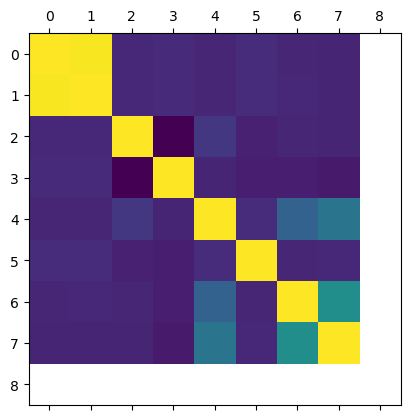

In [13]:
#Creating correlation heatmap using matplotlib
plt.matshow(df_guns.corr())
plt.show()

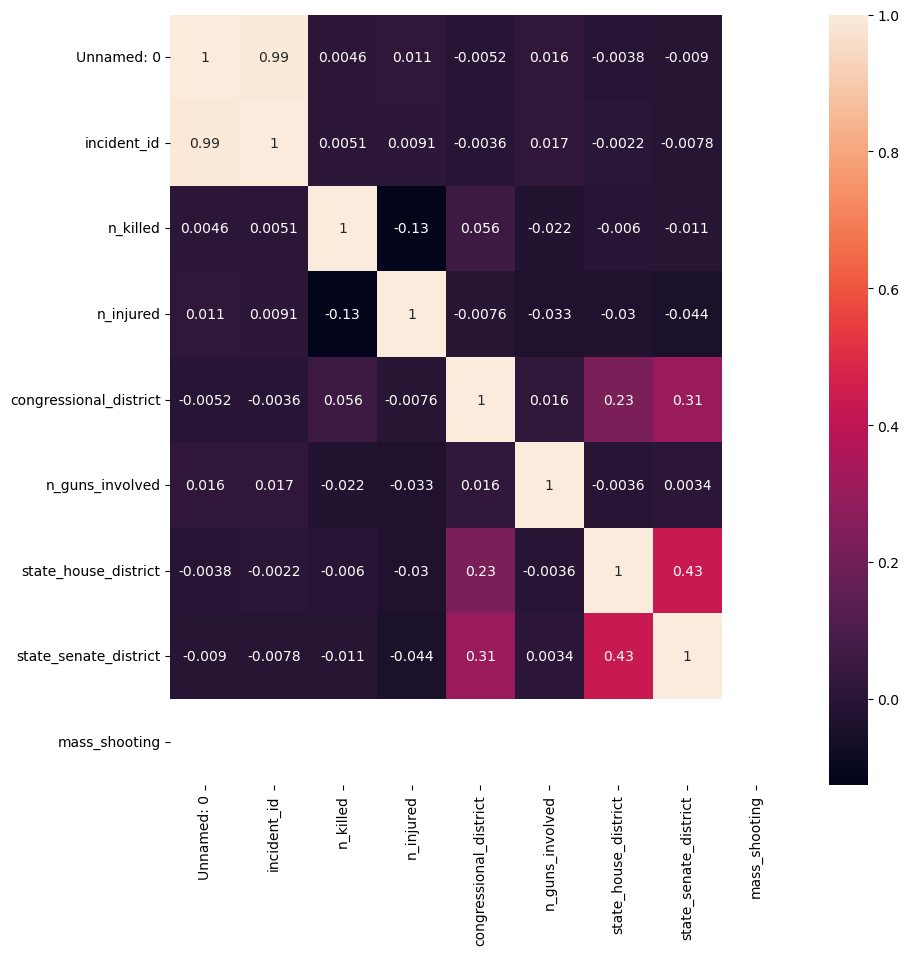

In [14]:
#Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_guns.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

#There are some moderate relationships between state house and state senate districts but that's to be expected and not useful to my analysis

## 3b. Scatterplot

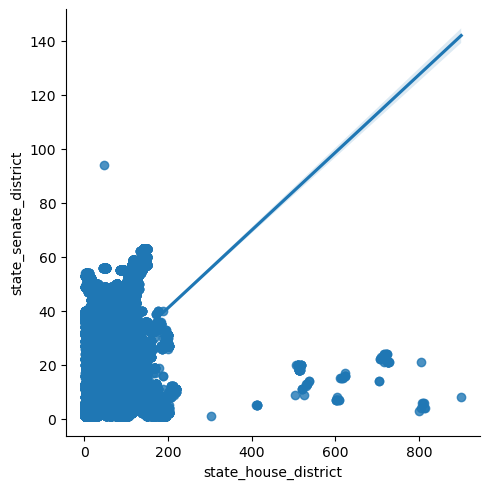

In [15]:
#Creating a scatterplot for the "state_house_district" and "state_senate_district" columns in seaborn
#No useful for analysis but this is the strongest correlation
sns.lmplot(x = 'state_house_district', y = 'state_senate_district', data = df_guns)

All of the numbers are bunched up in the bottom left corner because that's just how the state congressional districts are numbered.

## 3c. Pair Plots

In [16]:
#Keeping only the variables I want to use in the pair plot
sub = df_guns[['n_killed', 'n_injured', 'n_guns_involved', 'congressional_district']]

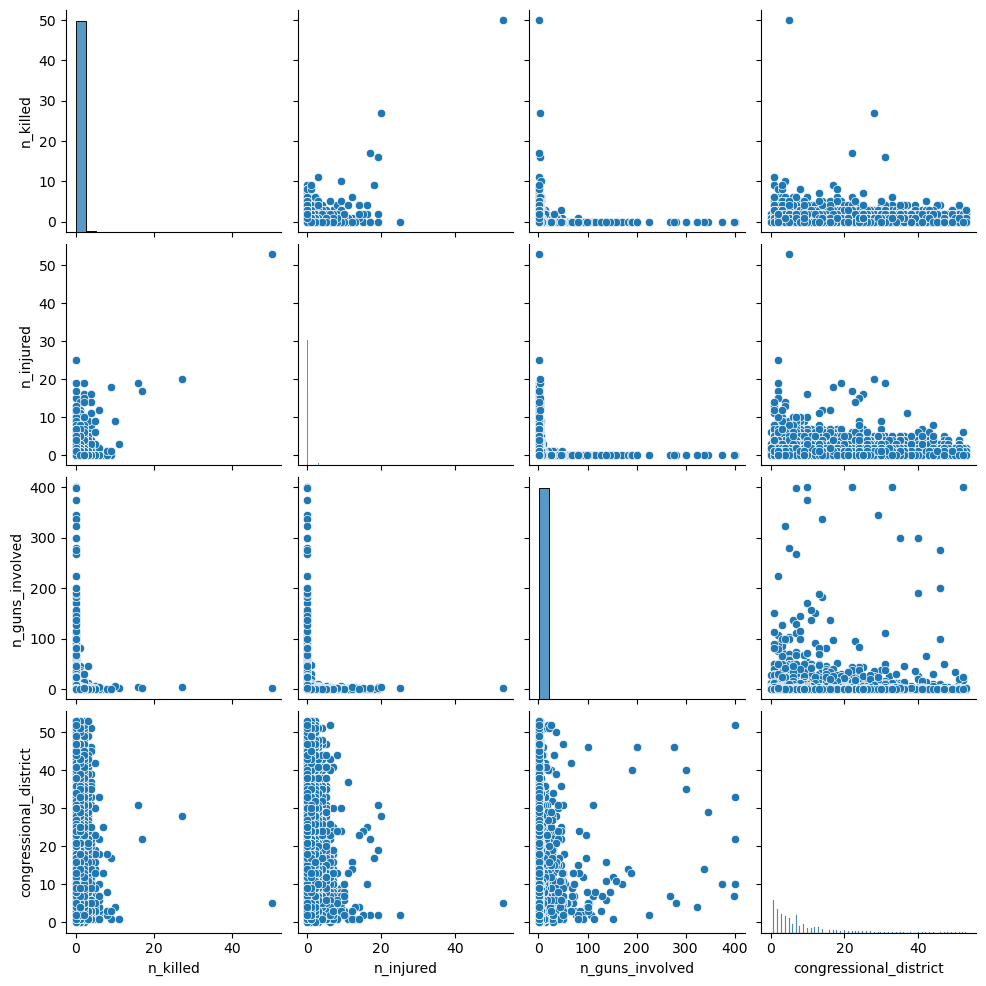

In [17]:
# Creating a pair plot 
g = sns.pairplot(sub)

No useful correlations found. 

## 3d. Categorical Plot

<AxesSubplot:xlabel='congressional_district', ylabel='Count'>

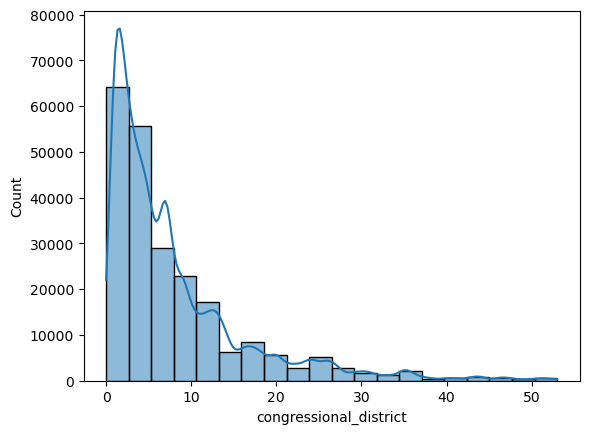

In [18]:
#Creating categorical plot
sns.histplot(df_guns['congressional_district'], bins = 20, kde = True)

No useful information found in this plot. This is just showing the number distribution of congressional districts.

# 4. Questions and Hypothesis

What questions from 6.1 can be answered?

How many of these incidents were mass shootings (four or more victims)? 1637

What percent of total gun violence incidents do mass shootings represent? 0.68%

Hypothesis: The number of mass shootings per year has increased between 2013-2018.

# 5. Exporting Data

In [19]:
#Exporting updated dataframe
df_guns.to_csv(os.path.join(path, '02 Data','Prepared Data', 'guns_clean_2.csv'))